# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
# Build query URL
query_url = 'http://api.openweathermap.org/data/2.5/weather?appid=' + weather_api_key + '&units=imperial' + '&q='

city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Print first line
print("Beginning Data Retrieval")

# Set first values for record and set counts
record_count = 1
set_count = 1

for city in cities:  
    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city.title()}")
        response = requests.get(query_url + city).json()
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])       
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
    except KeyError:
        print(f"City not found. Skipping...")

    record_count += 1
    if record_count == 51:
        record_count = 1
        set_count += 1
        
# Print end of loop
print("Data Retrieval Complete")


Beginning Data Retrieval
Processing Record 1 of Set 1 | Mithimna
City not found. Skipping...
Processing Record 2 of Set 1 | Leningradskiy
Processing Record 3 of Set 1 | Vangaindrano
Processing Record 4 of Set 1 | Barrow
Processing Record 5 of Set 1 | Bredasdorp
Processing Record 6 of Set 1 | Nuqui
Processing Record 7 of Set 1 | Avarua
Processing Record 8 of Set 1 | Pisco
Processing Record 9 of Set 1 | Big Spring
Processing Record 10 of Set 1 | Ponta Delgada
Processing Record 11 of Set 1 | Leshukonskoye
Processing Record 12 of Set 1 | Karamea
City not found. Skipping...
Processing Record 13 of Set 1 | Halalo
City not found. Skipping...
Processing Record 14 of Set 1 | Rikitea
Processing Record 15 of Set 1 | Ushuaia
Processing Record 16 of Set 1 | Pokhara
Processing Record 17 of Set 1 | Lorengau
Processing Record 18 of Set 1 | Chardara
Processing Record 19 of Set 1 | Galiwinku
City not found. Skipping...
Processing Record 20 of Set 1 | Ndende
Processing Record 21 of Set 1 | Georgetown
Pro

Processing Record 40 of Set 4 | Batie
Processing Record 41 of Set 4 | Pauini
Processing Record 42 of Set 4 | Leduc
Processing Record 43 of Set 4 | Chimbote
Processing Record 44 of Set 4 | Diffa
Processing Record 45 of Set 4 | Katsuura
Processing Record 46 of Set 4 | Gravdal
Processing Record 47 of Set 4 | Hanzhong
Processing Record 48 of Set 4 | Ponta Do Sol
Processing Record 49 of Set 4 | Khani
Processing Record 50 of Set 4 | Show Low
Processing Record 1 of Set 5 | Cidreira
Processing Record 2 of Set 5 | Teahupoo
Processing Record 3 of Set 5 | Coihaique
Processing Record 4 of Set 5 | Milkovo
Processing Record 5 of Set 5 | Dhidhdhoo
Processing Record 6 of Set 5 | Mizpe Ramon
City not found. Skipping...
Processing Record 7 of Set 5 | Grand River South East
City not found. Skipping...
Processing Record 8 of Set 5 | General Roca
Processing Record 9 of Set 5 | Castro
Processing Record 10 of Set 5 | Cockburn Harbour
City not found. Skipping...
Processing Record 11 of Set 5 | Taoudenni
Proce

Processing Record 32 of Set 8 | Turki
Processing Record 33 of Set 8 | Fort Nelson
Processing Record 34 of Set 8 | Elat
Processing Record 35 of Set 8 | Kruisfontein
Processing Record 36 of Set 8 | Kemin
Processing Record 37 of Set 8 | Monrovia
Processing Record 38 of Set 8 | Manicore
Processing Record 39 of Set 8 | Barentsburg
City not found. Skipping...
Processing Record 40 of Set 8 | Algarrobo
Processing Record 41 of Set 8 | Nyakabindi
Processing Record 42 of Set 8 | Muravlenko
Processing Record 43 of Set 8 | Singaraja
Processing Record 44 of Set 8 | Faranah
Processing Record 45 of Set 8 | Keelung
Processing Record 46 of Set 8 | Saurimo
Processing Record 47 of Set 8 | Monduli
Processing Record 48 of Set 8 | Mys Shmidta
City not found. Skipping...
Processing Record 49 of Set 8 | Neuquen
Processing Record 50 of Set 8 | Richards Bay
Processing Record 1 of Set 9 | Poum
Processing Record 2 of Set 9 | Ostrovnoy
Processing Record 3 of Set 9 | Kenitra
Processing Record 4 of Set 9 | Ust-Tsilma

Processing Record 19 of Set 12 | Tyshkivka
Processing Record 20 of Set 12 | Oussouye
Processing Record 21 of Set 12 | Teya
Processing Record 22 of Set 12 | Guerrero Negro
Processing Record 23 of Set 12 | Salem
Processing Record 24 of Set 12 | A
City not found. Skipping...
Processing Record 25 of Set 12 | Chebenki
Processing Record 26 of Set 12 | Borodyanka
Processing Record 27 of Set 12 | Santa Ana
Processing Record 28 of Set 12 | Tingi
Processing Record 29 of Set 12 | Jasper
Processing Record 30 of Set 12 | Prince George
Processing Record 31 of Set 12 | Minsk
Processing Record 32 of Set 12 | Setubal
Processing Record 33 of Set 12 | Warqla
City not found. Skipping...
Processing Record 34 of Set 12 | Casas Grandes
Processing Record 35 of Set 12 | Carballo
Processing Record 36 of Set 12 | Porbandar
Processing Record 37 of Set 12 | Daru
Processing Record 38 of Set 12 | Chicama
Processing Record 39 of Set 12 | Tiarei
Processing Record 40 of Set 12 | Aswan
Processing Record 41 of Set 12 | B

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#Create data frame for city data
weather_data = {"City":city_name, 
           "Lat": lat, 
           "Lng": lng,
           "Max Temp": max_temp,
           "Humidity": humidity,
           "Cloudiness": cloudiness,
           "Wind Speed": wind_speed, 
           "Country": country,
           "Date": date}

In [36]:
#print(len(city_name), len(lat), len(lng), len(max_temp), len(humidity), len(cloudiness), len(wind_speed), len(country), len(date))
weather_df = pd.DataFrame(weather_data)


#Convert data frame to CSV file
weather_df.to_csv('cities.csv',index=False)

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leningradskiy,69.38,178.42,-2.79,91,100,5.57,RU,1608498985
1,Vangaindrano,-23.35,47.60,75.06,92,38,4.32,MG,1608498985
2,Barrow,71.29,-156.79,-20.20,75,1,10.29,US,1608498985
3,Bredasdorp,-34.53,20.04,66.20,88,0,5.82,ZA,1608498985
4,Nuquí,5.71,-77.27,79.14,83,100,7.47,CO,1608498986
...,...,...,...,...,...,...,...,...,...
562,Heihe,50.24,127.49,-7.60,76,0,0.81,CN,1608499070
563,Cassilândia,-19.11,-51.73,87.26,54,100,2.57,BR,1608499070
564,Hammond,41.58,-87.50,41.00,56,1,12.75,US,1608499070
565,Birobidzhan,48.80,132.95,0.50,88,69,2.33,RU,1608499070


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.


In [37]:
#  Get the indices of cities that have humidity over 100%.
outliers = weather_df[weather_df['Humidity']>100].index
outliers

Int64Index([], dtype='int64')

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_clean = weather_df.drop(outliers)
weather_clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False
5,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
562,False,False,False,False,False,False,False,False,False
563,False,False,False,False,False,True,False,False,False
564,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False


In [38]:
weather_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Date']].describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.662257,14.981005,50.990635,74.663139,55.470899,7.792152,1.608499e+09
std,33.151528,90.161667,30.576798,20.434099,39.625305,5.469002,8.118616e+01
min,-54.800000,-179.170000,-44.340000,1.000000,0.000000,0.470000,1.608499e+09
25%,-6.760000,-65.060000,34.000000,67.000000,15.500000,3.880000,1.608499e+09
50%,25.260000,18.940000,60.010000,81.000000,72.000000,6.440000,1.608499e+09
75%,49.585000,92.825000,75.810000,88.000000,96.000000,10.290000,1.608499e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,32.210000,1.608499e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

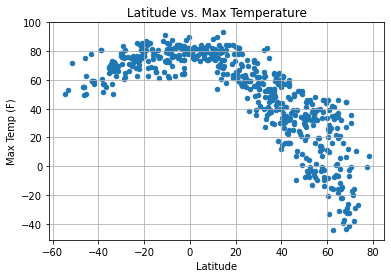

In [42]:
weather_df.plot.scatter('Lat','Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Latitude vs. Max Temperature')
plt.grid()

#This plot is analysing the max temperature of cities and their latitude. 
#Looking at the plot we can tell that the tempurature is warmer closer to the equator. 
#We can also observe that it must be summer in the southern hemisphere because the tempuratures are similar to those at the equator.

## Latitude vs. Humidity Plot

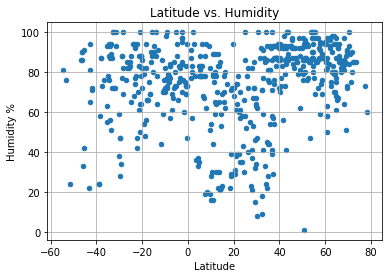

In [41]:
weather_df.plot.scatter('Lat','Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs. Humidity')
plt.grid()

#This plot shows humidity compared to each city's latitude. 
#Based on the plot the humidity appears to be lower around the equator. 

## Latitude vs. Cloudiness Plot

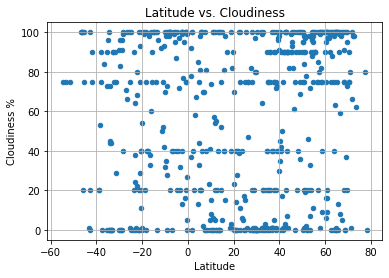

In [43]:
weather_df.plot.scatter('Lat','Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs. Cloudiness')
plt.grid()

#This plot is showing cloud cover compared to a city's latitude.
#Looking at the plot there does not appear to be a relationship between a city's latitude and cloud coverage.

## Latitude vs. Wind Speed Plot

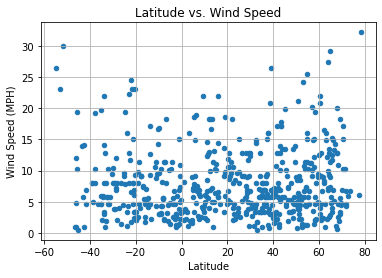

In [44]:
weather_df.plot.scatter('Lat','Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('Latitude vs. Wind Speed')
plt.grid()

#This plot is showing wind speed compared to a city's latitude.
#Looking at the plot there does not appear to be a relationship between a city's latitude and wind speed.

## Linear Regression

In [46]:
#Create separate data frames for the northern and souther hemispheres.

northern = weather_df[weather_df['Lat'] >= 0]
southern = weather_df[weather_df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8416634994253941.
The p-value is: 3.828282355948319e-106.


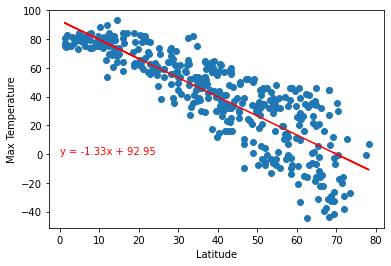

In [49]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 10, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.5933409687717389.
The p-value is: 4.047741878283021e-18.


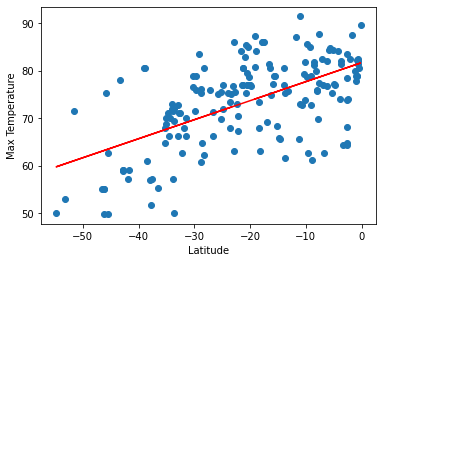

In [50]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 10, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.40224084002867333.
The p-value is: 1.2245475511400384e-16.


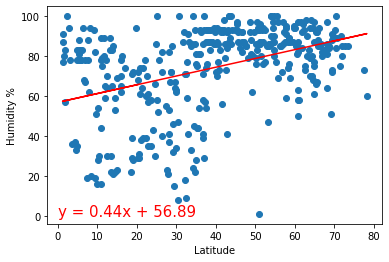

In [51]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.15714765404306105.
The p-value is: 0.037260033445739395.


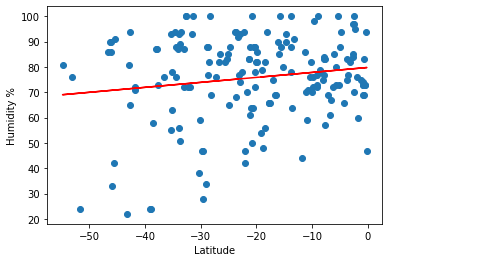

In [52]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.26186501426150915.
The p-value is: 1.4930178628942188e-07.


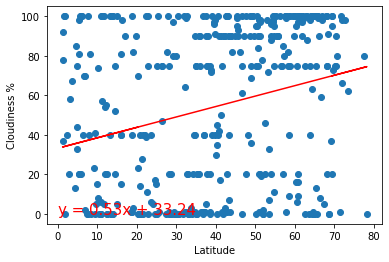

In [53]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.10558481611314079.
The p-value is: 0.1631180008309553.


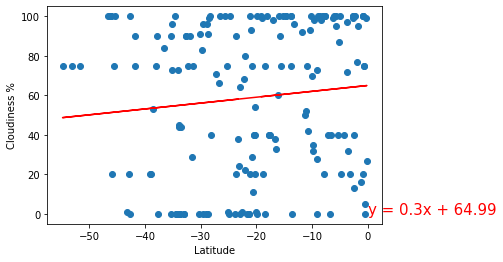

In [54]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.09097619745756336.
The p-value is: 0.07235051168390776.


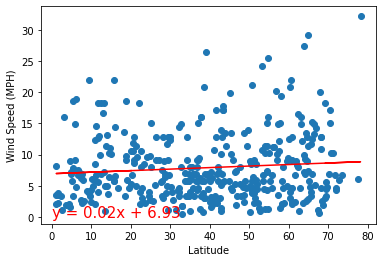

In [55]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.24755494042210507.
The p-value is: 0.0009246651565654079.


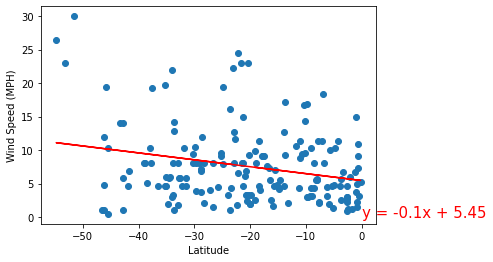

In [56]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_equation = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,0),fontsize = 15, color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-value is {rvalue}.")
print(f"The p-value is: {pvalue}.")
plt.show()